<a href="https://colab.research.google.com/github/esj3820/Alura-Latam-Telecom-X/blob/main/AluraLatamTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción de Datos**

Diccionario de datos

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente






In [1]:
#Importar Pandas
import pandas as pd

In [3]:
#Lectura del set de datos contenidos en un archivo con extensión .JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

In [4]:
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **TRANSFORMACION**

In [5]:
#Creamos un dataframe que contenga las columnas que contienen un elemento .json como valor
df_json = df[['customer','phone','internet','account']]

In [6]:

for columna in df_json:
  df_normalize = pd.json_normalize(df[columna])
  df = pd.concat([df, df_normalize], axis=1)
  df = df.drop(columns=[columna])

In [7]:
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
# Valores de cada columna
for columna in df:
  print(f'{columna}: {pd.unique(df[columna])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [10]:
#Revisamos los indicadores que se encuentran en blanco en las columnas
for columna in df:
  print(df[columna].dtype)
  if(df[columna].dtype == 'object'):
    print(f'Hay {df[columna].str.isspace().sum()} valores en blanco en la columna {columna}')

object
Hay 0 valores en blanco en la columna customerID
object
Hay 0 valores en blanco en la columna Churn
object
Hay 0 valores en blanco en la columna gender
int64
object
Hay 0 valores en blanco en la columna Partner
object
Hay 0 valores en blanco en la columna Dependents
int64
object
Hay 0 valores en blanco en la columna PhoneService
object
Hay 0 valores en blanco en la columna MultipleLines
object
Hay 0 valores en blanco en la columna InternetService
object
Hay 0 valores en blanco en la columna OnlineSecurity
object
Hay 0 valores en blanco en la columna OnlineBackup
object
Hay 0 valores en blanco en la columna DeviceProtection
object
Hay 0 valores en blanco en la columna TechSupport
object
Hay 0 valores en blanco en la columna StreamingTV
object
Hay 0 valores en blanco en la columna StreamingMovies
object
Hay 0 valores en blanco en la columna Contract
object
Hay 0 valores en blanco en la columna PaperlessBilling
object
Hay 0 valores en blanco en la columna PaymentMethod
float64
obje

In [11]:
# Importamos la biblioteca Numpy
import numpy as np

In [12]:
# Reemplazamos por 0 los indicacdores en blanco de la columna Charges.Total.
df['Charges.Total'] = df['Charges.Total'].replace(' ', '0')
df['Charges.Total'].str.isspace().sum()


np.int64(0)

In [13]:
#Convertimos a float la columna a Charges.Total.
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [15]:
#Vemos Churn

filas_vacias_Churn = df['Churn'] == ''
print(filas_vacias_Churn.sum())
print(f'La columna "Churn" tiene {filas_vacias_Churn.sum()} filas vacías')

224
La columna "Churn" tiene 224 filas vacías


In [16]:
#Reemplazamos los indicadores vacíos por Nan.
df['Churn'] = df['Churn'].replace('', np.nan)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [45]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Sumatoria'],
      dtype='object')

In [46]:
df.columns=df.columns.str.lower()

In [47]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,sumatoria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [20]:
df.head(15)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


In [48]:
for columna in df:
  if(df[columna].dtype == 'object'):
    df[columna] = df[columna].str.lower()

In [50]:
sumatoria = df['charges.monthly'] /30
df['sumatoria'] = sumatoria
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,sumatoria
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


# **ESTANDARIZACIÓN Y TRANSFORMACIÓN DE LOS DATOS**

In [51]:
# Ahora debemos reemplazar el elemento 'yes' por el valor 1 y el elemento 'no' por el valor 0 en estas columnas.

df['partner'] = df['partner'].replace({'yes': 1, 'no': 0})

df['dependents'] = df['dependents'].replace({'yes': 1, 'no': 0})

df['phoneservice'] = df['phoneservice'].replace({'yes': 1, 'no': 0})

df['aperlessbilling'] = df['paperlessbilling'].replace({'yes': 1, 'no': 0})

df.head()

/tmp/ipython-input-2362488295.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['partner'] = df['partner'].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2362488295.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dependents'] = df['dependents'].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2362488295.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,sumatoria,aperlessbilling
0,0002-orfbo,no,female,0,1,1,9,1,no,dsl,...,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667,1
1,0003-mknfe,no,male,0,0,0,9,1,yes,dsl,...,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667,0
2,0004-tlhlj,yes,male,0,0,0,4,1,no,fiber optic,...,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333,1
3,0011-igkff,yes,male,1,1,0,13,1,no,fiber optic,...,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667,1
4,0013-exchz,yes,female,1,1,0,3,1,no,fiber optic,...,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667,1


# **ANÁLISIS**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [53]:
df.describe(include='all')

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,sumatoria,aperlessbilling
count,7267,7043,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000,7267.000000
unique,7267,2,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,2,4,NaN,NaN,NaN,NaN
top,9995-hotoh,no,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,no,no,no,month-to-month,yes,electronic check,NaN,NaN,NaN,NaN
freq,1,5174,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2277.182035,2.157337,0.593230
std,NaN,NaN,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.648587,1.004319,0.491265
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,0.608333,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,396.200000,1.180833,0.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1389.200000,2.343333,1.000000
75%,NaN,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3778.525000,2.995833,1.000000


In [56]:
df['churn'] = df['churn'].fillna('no')

In [58]:
print(df['churn'].isnull().sum())

0


In [59]:
# Reemplazamos en churn
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-3405200756.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})


In [60]:
df_churn_no = df[df['churn'] == 0]
df_churn_yes = df[df['churn'] == 1]

In [61]:
cantidad_yes = df_churn_yes['churn'].count()
cantidad_no = df_churn_no['churn'].count()
cantidad_yes

np.int64(1869)

In [62]:
# Importando Matplotlib.
import matplotlib.pyplot as plt

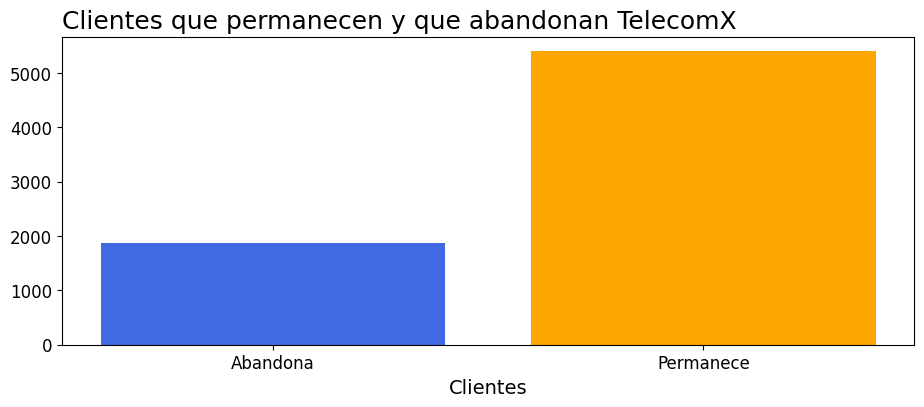

np.int64(5398)

In [66]:
# Creando graficos de Churn

colores = ['royalblue','orange','forestgreen','orchid',
           'purple','brown','slateblue','gray','olive',
           'navy','teal','tomato',]

fig, ax = plt.subplots(figsize=(11,4))

ax.bar(['Abandona', 'Permanece'], [cantidad_yes,cantidad_no],color=colores)
ax.set_title('Clientes que permanecen y que abandonan TelecomX',loc='left',
            fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Clientes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


plt.show()

cantidad_no

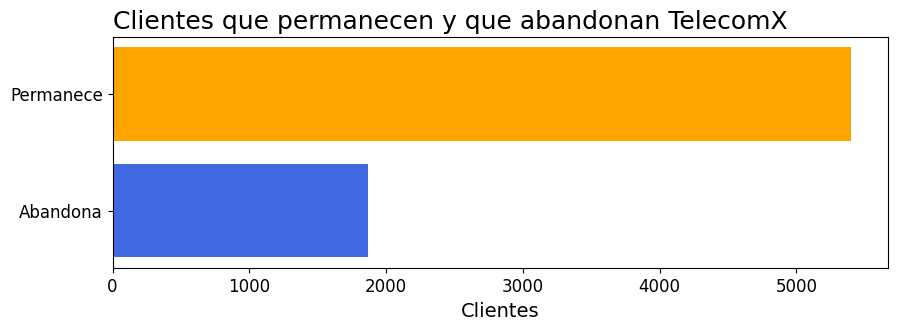

np.int64(5398)

In [69]:
fig, ax = plt.subplots(figsize=(10,3))

ax.barh(['Abandona', 'Permanece'], [cantidad_yes,cantidad_no],color=colores)
ax.set_title('Clientes que permanecen y que abandonan TelecomX',loc='left',
            fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Clientes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

cantidad_no

In [70]:
#Análisis de evasión

#Por Género
cantidad_evasion_masculina = df_churn_yes[df_churn_yes['gender'] == 'male']['gender'].count()
cantidad_evasion_femenina = df_churn_yes[df_churn_yes['gender'] == 'female']['gender'].count()

#Por modo de contrato (Contract: ['One year' 'Month-to-month' 'Two year'])
cantidad_evasion_contrato_oneyear =  df_churn_yes[df_churn_yes['contract'] == 'one year']['contract'].count()
cantidad_evasion_contrato_month_to_month = df_churn_yes[df_churn_yes['contract'] == 'month-to-month']['contract'].count()
cantidad_evasion_contrato_two_year = df_churn_yes[df_churn_yes['contract'] == 'two year']['contract'].count()

#Por Medio de pago (PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'])
evasion_medios_pago = []
for value in pd.unique(df['paymentmethod']):
  cantidad = df_churn_yes[df_churn_yes['paymentmethod'] == value]['paymentmethod'].count()
  evasion_medios_pago.append({value:cantidad})

df_evasion_medios_pago = pd.DataFrame(evasion_medios_pago)
df_evasion_medios_pago = df_evasion_medios_pago.fillna(0)
df_evasion_medios_pago

df_totales = df_evasion_medios_pago.sum()


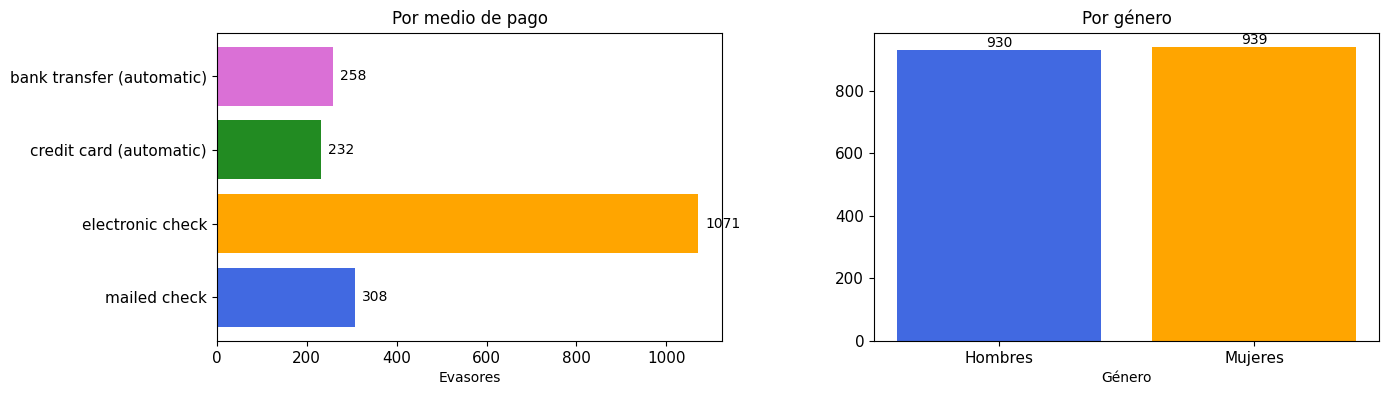

In [78]:
fix, axs = plt.subplots(1,2,figsize=(15,4))
#Ajustar la posición de los subplots
fix.subplots_adjust(hspace=40,wspace=0.3)

axs[0].barh(df_totales.index, df_totales,color=colores)
bars = axs[0].barh(df_totales.index, df_totales,color=colores)
axs[0].bar_label(bars, fmt='%d', padding=5)
axs[0].set_title('Por medio de pago')
axs[0].set_xlabel('Evasores')
axs[0].set_ylabel('')
axs[0].xaxis.set_tick_params(labelsize=11)
axs[0].yaxis.set_tick_params(labelsize=11)


axs[1].bar(['Hombres','Mujeres'],[cantidad_evasion_masculina,cantidad_evasion_femenina],color=colores)
bars = axs[1].bar(['Hombres','Mujeres'],[cantidad_evasion_masculina,cantidad_evasion_femenina],color=colores)
#axs[1].bar_label(bar_container, fmt='%d', padding=5)
axs[1].set_title('Por género')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('')
axs[1].xaxis.set_tick_params(labelsize=11)
axs[1].yaxis.set_tick_params(labelsize=11)

for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.0f}', ha='center', va='bottom', color='black', fontsize=10)


plt.show()

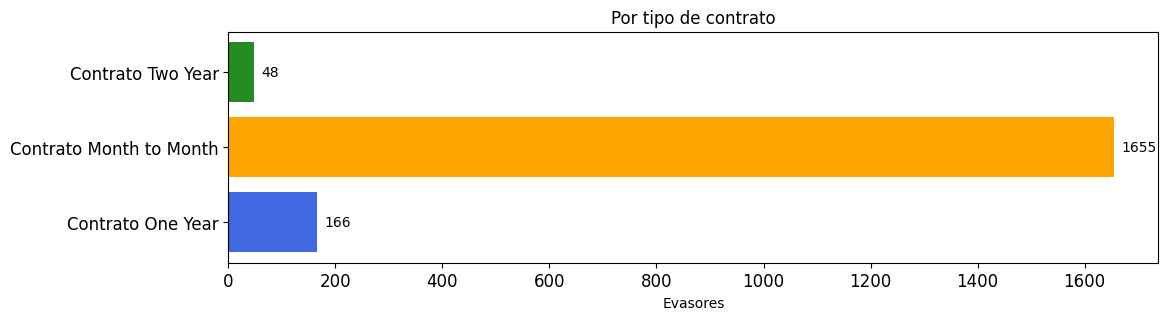

In [77]:
fig, ax = plt.subplots(figsize=(12,3))
fig.subplots_adjust(hspace=40,wspace=0.3)

ax.barh(['Contrato One Year','Contrato Month to Month','Contrato Two Year'], [cantidad_evasion_contrato_oneyear,cantidad_evasion_contrato_month_to_month,cantidad_evasion_contrato_two_year],color=colores)
bars = ax.barh(['Contrato One Year','Contrato Month to Month','Contrato Two Year'], [cantidad_evasion_contrato_oneyear,cantidad_evasion_contrato_month_to_month,cantidad_evasion_contrato_two_year],color=colores)
ax.bar_label(bars, fmt='%d', padding=5)
ax.set_title('Por tipo de contrato')
ax.set_xlabel('Evasores')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

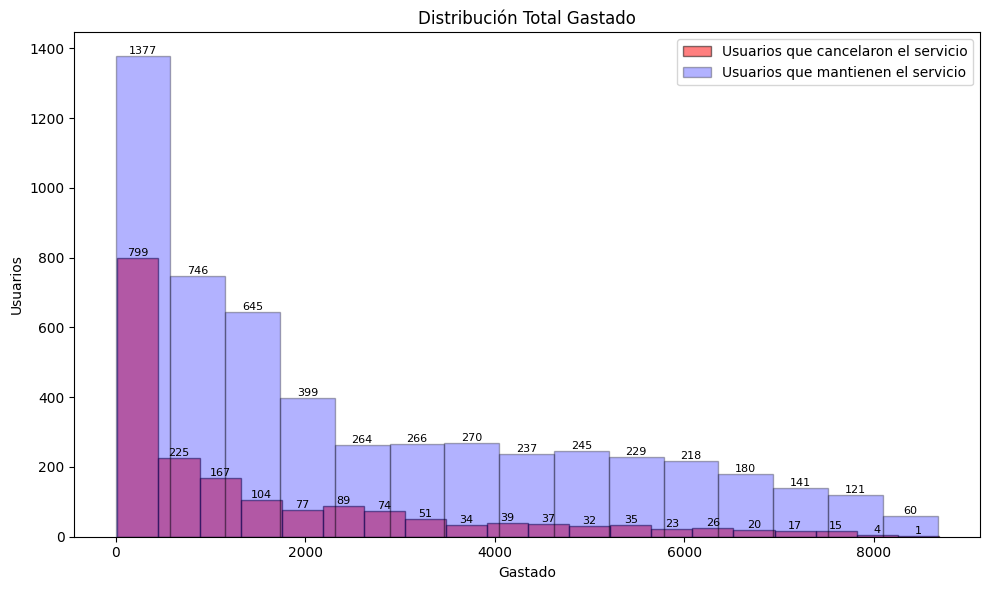

In [80]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma para usuarios que cancelaron
ax.hist(df_churn_yes['charges.total'], bins=20, alpha=0.5, label='Usuarios que cancelaron el servicio', color='red', edgecolor='black')

# Histograma para usuarios que no cancelaron
ax.hist(df_churn_no['charges.total'], bins=15, alpha=0.3, label='Usuarios que mantienen el servicio', color='blue', edgecolor='black')

# Etiquetas y título
ax.set_xlabel('Gastado')
ax.set_ylabel('Usuarios')
ax.set_title('Distribución Total Gastado')

# Leyenda
ax.legend()

# Añadir cifras en las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Evita mostrar texto en barras vacías
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(int(height)),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Mostrar gráfico
plt.tight_layout()
plt.show()



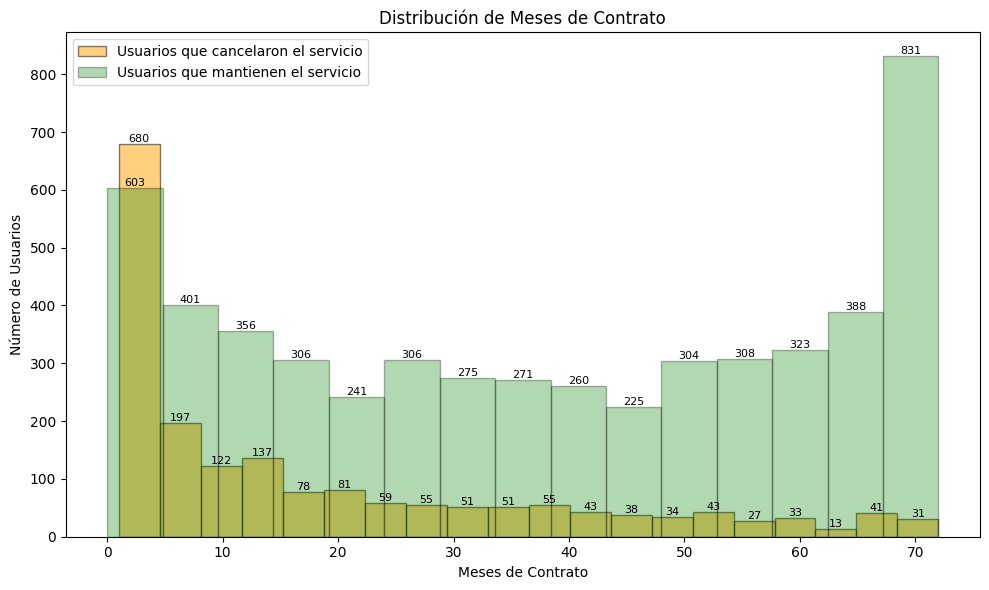

In [81]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma para usuarios que cancelaron
ax.hist(df_churn_yes['tenure'], bins=20, alpha=0.5, label='Usuarios que abandonaron', color='orange', edgecolor='black')

# Histograma para usuarios que no cancelaron
ax.hist(df_churn_no['tenure'], bins=15, alpha=0.3, label='Usuarios ', color='green', edgecolor='black')

# Etiquetas y título
ax.set_xlabel('Meses de Contrato')
ax.set_ylabel('Número de Usuarios')
ax.set_title('Distribución de Meses de Contrato')

# Leyenda
ax.legend()

# Añadir cifras en las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            str(int(height)),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Mostrar gráfico
plt.tight_layout()
plt.show()



# **OBJETIVO DE ANÁLISIS**

El análisis de TelecomX se llevó a cabo con el objetivo principal de entender y dar a conocer las causas de la alta evasión de clientes que está experimentando la empresa, lo cual representa pérdidas monetarias significativas.
Para este análisis, se realizó un proceso de limpieza y procesamiento de datos utilizando las librerías Pandas y Numpy. Esto incluyó:

• Importar datos con read_json().

• Verificar el dataset con head() e identificar columnas con valores JSON.

• Normalizar columnas JSON y concatenarlas al dataframe original, eliminando las columnas JSON originales.

• Analizar el dataframe final con info() para verificar la cantidad de entradas, columnas y tipos de datos.

• Buscar valores únicos con unique().

• Identificar y manejar 11 valores en blanco en la columna "Charges.total", reemplazándolos por cero, asumiendo que corresponden a nuevos clientes sin pagos aún.

• Cambiar el tipo de dato de la columna "Charges.Total" de "object" a "float".

• Transformar a minúsculas todas las columnas tipo string y reemplazar los valores "yes" y "no" por "1" y "0" respectivamente en todo el dataset.

• Calcular la columna "Cuentas diarias" dividiendo "Charges.Monthly" entre 30.
Los hallazgos clave del análisis exploratorio de datos y las conclusiones incluyen:

• Alta tasa de evasión general: El 25.7% del total de clientes (1869 de 7267) se ha dado de baja.

• El género no es un factor determinante: La diferencia en la evasión entre hombres y mujeres es mínima (0.5%), sugiriendo que las estrategias de retención no deberían enfocarse en este aspecto.

• Medio de pago "Electronic check": Es el mayor contribuyente a la evasión, con un 57.3% de los evasores utilizándolo. Los medios de pago automáticos (Bank transfer y Credit card) y Mailed check presentan tasas de evasión significativamente menores (13.8%, 12.4% y 16.4% respectivamente). Los medios de pago automáticos son los que menos evasión presentan.

• Tipo de contrato "Month to month": Es el principal generador de evasión, con un 88.55% de los evasores teniendo este tipo de contrato. Los contratos a largo plazo (Two year y One year) muestran tasas de evasión muy bajas (2.56% y 8.88% respectivamente).

• Evasión en los primeros meses de contrato: La mayoría de los clientes que cancelaron el servicio lo hicieron durante los primeros meses de contrato, indicando un periodo crítico de "churn" temprano. La tasa de evasión disminuye a medida que los clientes permanecen más tiempo en la empresa.

• Concentración de evasión en rangos de gasto bajos: Un gran número de usuarios que cancelaron el servicio se encontraban en los rangos de gasto más bajos (cercanos a 0). Esto podría deberse a la promoción de planes con costo inicial bajo seguidos de ajustes abruptos de precio, o a deficiencias en la post-venta.
Con base en estas conclusiones, se proponen las siguientes recomendaciones estratégicas para TelecomX_LATAM:

• Priorizar la contratación de planes a largo plazo: Se debe reestructurar la oferta para incentivar fuertemente planes de uno o dos años, ofreciendo descuentos de fidelidad, beneficios adicionales o precios especiales, y reduciendo drásticamente los incentivos para planes mes a mes debido a su alto riesgo de evasión.

• Promover activamente los medios de pago con baja tasa de evasión: Se recomienda desincentivar el "Electronic Check" y fomentar el uso de "Bank Transfer (automatic)" o "Credit Card (automatic)" para nuevos clientes mediante campañas con beneficios. También se debería considerar campañas para migrar a clientes actuales que usan "Electronic Check".

• Fortalecer la retención temprana de clientes: Diseñar e implementar un programa de bienvenida y seguimiento intensivo durante los primeros meses, incluyendo un onboarding robusto, comunicación proactiva para verificar satisfacción, resolver dudas, y ofrecer promociones de retención temprana. Además, se debe monitorear el uso para detectar patrones que predigan la evasión.

• Investigar el comportamiento de gasto y la percepción de valor: Realizar un estudio más profundo sobre los clientes con bajo gasto que cancelaron el servicio versus los que se quedaron, mediante encuestas de salida, análisis de procesos de post-venta (soporte técnico, atención al cliente, quejas) y evaluar si la estrategia de precios iniciales genera expectativas no cumplidas.
